Code was taken from "Coding with Qiskit" and all credits go to Abraham Asfaw and the Qiskit team

source: https://www.youtube.com/watch?v=a1NZC5rqQD8&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY

In [35]:
from qiskit import *

In [36]:
qr = QuantumRegister(2)

In [37]:
cr = ClassicalRegister(2)

In [38]:
circuit = QuantumCircuit(qr, cr)

In [39]:
%matplotlib inline

In [40]:
#Draw the quantum and classical registers
circuit.draw()

In [41]:
#Hadamard Gate
circuit.h(qr[0])

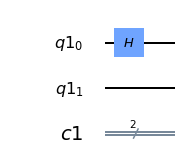

In [42]:
#Draw the circuit again through matplotlib
circuit.draw(output = 'mpl')

In [43]:
#Controlled X (A 2-qubit operation that acts like a if-else)
circuit.cx(qr[0], qr[1])

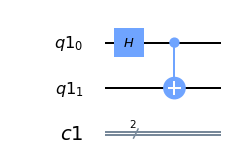

In [44]:
circuit.draw(output = 'mpl')

In [45]:
#Measure the circuits onto the classical bit
circuit.measure(qr, cr)

In [46]:
circuit.draw('mpl')

In [47]:
#import the quantum circuit simulator
simulator = Aer.get_backend('qasm_simulator')

In [48]:
result = execute(circuit, backend = simulator).result()

In [49]:
from qiskit.tools.visualization import plot_histogram

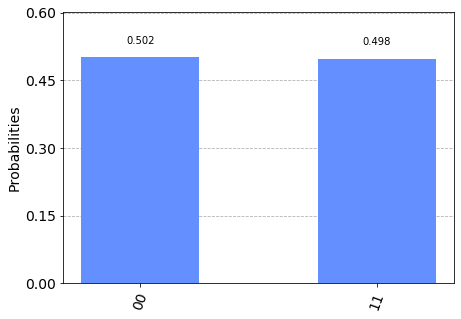

In [53]:
#Around 50% on 00 and 11
plot_histogram(result.get_counts(circuit))

In [57]:
IBMQ.load_account()

/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/qiskit/providers/models/backendconfiguration.py:337: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [58]:
provider = IBMQ.get_provider('ibm-q')

In [59]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [60]:
job = execute(circuit, backend=qcomp)

In [61]:
from qiskit.tools.monitor import job_monitor

In [62]:
job_monitor(job)

Job Status: job has successfully run


In [63]:
result = job.result()

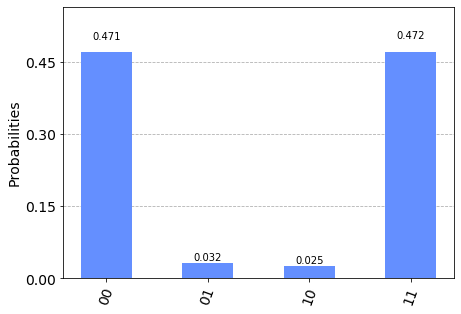

In [65]:
plot_histogram(result.get_counts(circuit))